# String_2

- 패턴 매칭

- 문자열 암호화

- 문자열 압축


## 패턴 매칭

- 고지식한 패턴 검색 알고리즘(브루트포스 알고리즘) : O(mn)

- 카프-라빈 알고리즘 : Θ(n)

- KMP 알고리즘 : Θ(n)

- **보이어-무어 알고리즘** : 최악의 경우 Θ(mn)

### 브루트포스 알고리즘

? 본문 문자열을 처음부터 끝까지 차례대로 순회하면서 패턴 내의 문자들을 일일이 비교하는 방식으로 동작

-- 만약 문자열 비교시 값이 다르면, t는 검색 이전 위치로 돌리고, p는 초기 위치로

    1. 

    t : A A B A C A  -->  t : A A B A C A

        
    p : A A X A A B  -->  p :   A A X A A B        


    2. 

    t : A A B A C A  -->  t : A A B A C A

    p : A A X A A B  -->  p :     A A X A A B     


                    ...

In [ ]:
'''
p = 찾을 패턴
t = 전체 텍스트
M = len(p)
N = len(t)
'''

def BruteForce(p, t):
    i = 0   # t의 index
    j = 0   # p의 index
    while j < M and i < N:
        if t[i] != p[i]:
            i = i - j
            j = -1          # 처음인덱스 - 1 로 이동

        # 한 칸씩 다시 더해줌
        i += 1      # i의 인덱스 = i - j + 1
        j += 1      # j의 인덱스 = 0
    if j == M:
        return i - M
    else: return -1

### KMP 알고리즘

- 텍스트에서 abcdabc까지는 매치되고, e에서 실패한 상황 패턴의 맨 앞의 abc와 실패 직전의 abc는 동일함을 이용한다.

- 실패한 텍스트의 문자와 p[4]를 비교한다

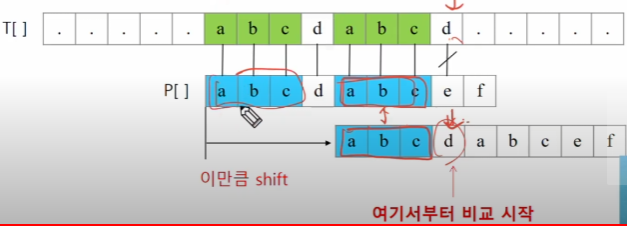

- 매칭에 실패했을 때 돌아갈 곳을 계산한다.

    -> 패턴의 각 위치에 대해 매칭에 실패했을 때 돌아갈 곳을 기억해둔다

    -> 일치한다면 누적 숫자만큼 count를 하고, 일치하지 않는다면 0


In [2]:
def kmp(t, p):
    N = len(t)
    M = len(p)
    lps = [0] * (M + 1)

    j = 0
    lps[0] = -1
    for i in range(1, M):
        lps[i] = j # p[i] 이전에 일치한 개수
        if p[i] == p[j]:
            j += 1
        else:
            j = 0
    lps[M] = j
    print(lps)

    i = 0
    j = 0
    while i < N and j <= M:
        if j == -1 or t[i] == p[j]:     # 첫글자가 일치한다면
            j += 1
            i += 1
        else:
            j = lps[j]
        if j == M:
            print(i - M, end = ' ')
            j = lps[j]

    print()
    return

t = 'zzzabcdabcdabcefabcd'
p = 'abcdabcef'
kmp(t, p)


[-1, 0, 0, 0, 0, 1, 2, 3, 0, 0]
7 


### 보이어-무어 알고리즘

- 오른쪽 -> 왼쪽 이동

- 대부분의 상용 sw에서 채택하는 알고리즘

- 보이어-무어 알고리즘은 패턴에 오른쪽 끝에 있는 문자가 불일치 하고 이 문자가 패턴 내에 존재하지 않는 경우, 이동거리는 무려 패턴의 길이만큼이 된다.

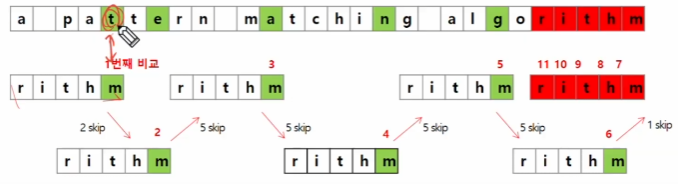